In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [15]:
from skimage.transform import resize as sk_resize
from skimage.filters import median, gaussian
from skimage.feature import canny
from skimage.filters import threshold_otsu

In [2]:
def gray_img(img):
    gray = rgb2gray(img)
    if len(img.shape) == 3:
        gray = gray*255
    return gray

In [3]:
def otsu(img):
    blur = gaussian(img)
    otsu_bin = 255*(blur > threshold_otsu(blur))
    return (otsu_bin/255).astype(np.int32)

In [9]:
def get_edges(img):
    gray = gray_img(img)
    filtered = median(gray)
    filtered = gaussian(gray)
    edges = canny(filtered, low_threshold=30, high_threshold=200)
    return edges

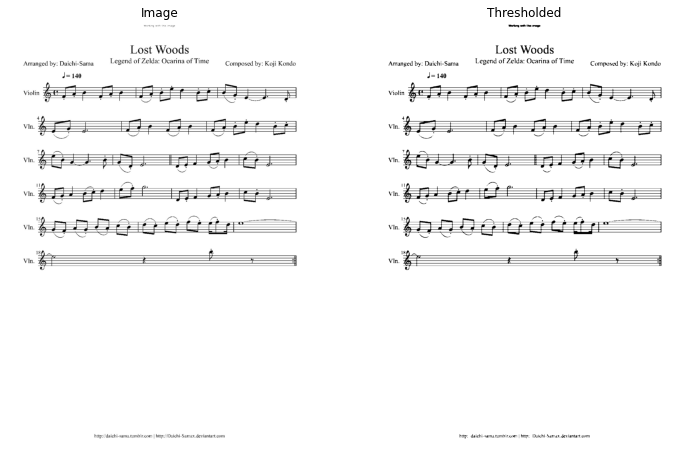

In [20]:
original_img = io.imread('dataset/lost.png')

img = np.copy(original_img)
thresholded = otsu(gray_img(img))
show_images([img, thresholded], ['Image', 'Thresholded'])

# Staff line detection
